In [30]:
# importing libraries and dependencies
import numpy as np
import pandas as pd
from gensim.models import Word2Vec
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('/kaggle/input/zomato-clean-dataset/zomato_clean.csv') # importing Dataset

In [32]:
df.head(5)

,Unnamed: 0,App,review_description,rating,no_of_tokens,no_of_character
0,0,Zomato,so basically it is the best approach you will ...,positive,81,425
1,1,Zomato,always late delivery no change late delivery u...,negative,65,337
2,2,Zomato,this app is froude with their zomato gold i ha...,negative,61,321
3,3,Zomato,i tried times adding an alternate number in yo...,negative,55,292
4,4,Zomato,in recent years zomato support has become less...,negative,81,453


In [33]:
df.info() # characteristics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247999 entries, 0 to 247998
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Unnamed: 0          247999 non-null  int64 
 1   App                 247999 non-null  object
 2   review_description  247999 non-null  object
 3   rating              247999 non-null  object
 4   no_of_tokens        247999 non-null  int64 
 5   no_of_character     247999 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 11.4+ MB


In [34]:
df['rating'].replace({'negative':0,'positive':1},inplace=True) # Encoding categorical data

In [35]:
df['review_description'] = df['review_description'].str.split() # converting sentences into tokens 

In [36]:
df['rating'].value_counts()

rating
0    124000
1    123999
Name: count, dtype: int64

In [37]:
X = df['review_description']
y = df['rating']

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [13]:
tokenizer.fit_on_texts(X_train)

In [14]:
word_index = tokenizer.word_index

In [15]:
len(word_index)

43131

In [16]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [19]:
document_len = []
for doc in X_train_sequences:
    document_len.append(len(doc))

In [20]:
np.quantile(document_len,0.95)

77.0

In [21]:
X_train_matrix = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequences,maxlen=80,padding='pre')
X_test_matrix = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequences,maxlen=80,padding='pre')

In [28]:
model_nn = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word_index)+1,output_dim=300,input_length=80),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model_nn.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model_nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [29]:
history_nn = model_nn.fit(X_train_matrix,y_train,validation_data=(X_test_matrix,y_test),epochs=10)

Epoch 1/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 106s 16ms/step - accuracy: 0.9314 - loss: 0.1852 - val_accuracy: 0.9529 - val_loss: 0.1444
Epoch 2/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9618 - loss: 0.1171 - val_accuracy: 0.9567 - val_loss: 0.1342
Epoch 3/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9684 - loss: 0.0987 - val_accuracy: 0.9551 - val_loss: 0.1420
Epoch 4/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9752 - loss: 0.0801 - val_accuracy: 0.9530 - val_loss: 0.1550
Epoch 5/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9792 - loss: 0.0677 - val_accuracy: 0.9513 - val_loss: 0.1689
Epoch 6/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9835 - loss: 0.0548 - val_accuracy: 0.9502 - val_loss: 0.1759
Epoch 7/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 0.9871 - loss: 0.0433 - val_accuracy: 0.9488 - val_loss: 0.2126
Epoch 8/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 101s 16ms/step - accuracy: 

In [31]:
model_nn.save('model_nn.h5')

In [33]:
import shutil

shutil.move('model_nn.h5', '/kaggle/working/model_nn.h5')

'/kaggle/working/model_nn.h5'

In [23]:
w2v_model = Word2Vec(X, vector_size=300,  window=20, min_count=1)

In [24]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    try:
        embedding_matrix[i] = w2v_model.wv[i]
    except:
        embedding_matrix[i] = np.zeros(100)

In [25]:
embedding_matrix.shape[1]

300

In [239]:
review_sequence = tokenizer.texts_to_sequences(["The restaurant was a complete disappointment. The food was bland and overcooked, and the service was slow and unprofessional. I had to wait forever to get the attention of the staff, and when I finally did, they were rude. The ambiance was nothing special either. Overall, a terrible experience that I would not recommend to anyone."

])
review_padded = tf.keras.preprocessing.sequence.pad_sequences(review_sequence, maxlen= 80, padding='pre')
prediction = model_w2v.predict(review_padded)
print("Prediction:", 'positive' if prediction[0][0] > 0.5 else 'negative')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Prediction: negative


In [36]:
w2v_model.wv.most_similar('deliveries')

[('orders', 0.6035391688346863),
 ('delivery', 0.5075523257255554),
 ('mostly', 0.5062543153762817),
 ('nights', 0.4741111397743225),
 ('inordinate', 0.46531569957733154),
 ('delevri', 0.4574331045150757),
 ('deleliverers', 0.4514451026916504),
 ('valets', 0.4461592435836792),
 ('assigning', 0.4415596127510071),
 ('extreme', 0.44000962376594543)]

In [154]:
w2v_model.save('w2v_model.model')

In [26]:
from gensim.models import Word2Vec

w2v_model.save('word2vec_model.bin')

In [29]:
import shutil
shutil.move('word2vec_model.bin', '/kaggle/working/word2vec_model.bin')

'/kaggle/working/word2vec_model.bin'

In [37]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [38]:
model_w2v = tf.keras.Sequential([
tf.keras.layers.Embedding(input_dim=len(word_index)+1,output_dim=300,input_length=80,weights=[embedding_matrix]),
tf.keras.layers.LSTM(128,return_sequences=True),
tf.keras.layers.LSTM(128),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model_w2v.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [39]:
history_w2v = model_w2v.fit(X_train_matrix,y_train,validation_data=(X_test_matrix,y_test),epochs=25,callbacks=[early_stopping])

Epoch 1/25
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 109s 17ms/step - accuracy: 0.9318 - loss: 0.1864 - val_accuracy: 0.9560 - val_loss: 0.1335
Epoch 2/25
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 106s 17ms/step - accuracy: 0.9633 - loss: 0.1145 - val_accuracy: 0.9560 - val_loss: 0.1356
Epoch 3/25
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 105s 17ms/step - accuracy: 0.9711 - loss: 0.0940 - val_accuracy: 0.9546 - val_loss: 0.1418
Epoch 4/25
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 105s 17ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9501 - val_loss: 0.1592


In [41]:
model_w2v.save('model_wtv.h5')

shutil.move('model_wtv.h5', '/kaggle/working/model_wtv.h5')

'/kaggle/working/model_wtv.h5'

In [42]:
model_blstm = tf.keras.Sequential([
tf.keras.layers.Embedding(input_dim=len(word_index)+1,output_dim=300,input_length=80,weights=[embedding_matrix]),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model_blstm.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [44]:
history_blstm = model_blstm.fit(X_train_matrix,y_train,validation_data=(X_test_matrix,y_test),epochs=10,callbacks=[early_stopping])

Epoch 1/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 189s 30ms/step - accuracy: 0.9481 - loss: 0.1520 - val_accuracy: 0.9554 - val_loss: 0.1345
Epoch 2/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 188s 30ms/step - accuracy: 0.9649 - loss: 0.1089 - val_accuracy: 0.9555 - val_loss: 0.1385
Epoch 3/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 188s 30ms/step - accuracy: 0.9717 - loss: 0.0910 - val_accuracy: 0.9545 - val_loss: 0.1442


In [45]:
model_blstm.save('model_blstm.h5')

In [46]:
import shutil

shutil.move('model_blstm.h5', '/kaggle/working/model_blstm.h5')

'/kaggle/working/model_blstm.h5'

In [48]:
model_gru = tf.keras.Sequential([
tf.keras.layers.Embedding(input_dim=len(word_index)+1,output_dim=300,input_length=80,weights=[embedding_matrix]),
tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128,return_sequences=True)),
tf.keras.layers.Bidirectional(tf.keras.layers.GRU(128)),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model_gru.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'binary_crossentropy')

In [49]:
history_gru = model_gru.fit(X_train_matrix,y_train,validation_data=(X_test_matrix,y_test),epochs=10,callbacks=[early_stopping])

Epoch 1/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 187s 30ms/step - accuracy: 0.9315 - loss: 0.1845 - val_accuracy: 0.9551 - val_loss: 0.1352
Epoch 2/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 184s 30ms/step - accuracy: 0.9639 - loss: 0.1125 - val_accuracy: 0.9545 - val_loss: 0.1395
Epoch 3/10
6200/6200 ━━━━━━━━━━━━━━━━━━━━ 184s 30ms/step - accuracy: 0.9713 - loss: 0.0924 - val_accuracy: 0.9527 - val_loss: 0.1486


In [50]:
model_gru.save('model_gru.h5')

In [51]:
import shutil

shutil.move('model_gru.h5', '/kaggle/working/model_gru.h5')

'/kaggle/working/model_gru.h5'

In [257]:
from sklearn.metrics import confusion_matrix, classification_report,auc, roc_curve, roc_auc_score

confusion matrix 
[[23346  1468]
 [ 1326 23460]]
------------------------------------------
classification report 
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     24814
           1       0.94      0.95      0.94     24786

    accuracy                           0.94     49600
   macro avg       0.94      0.94      0.94     49600
weighted avg       0.94      0.94      0.94     49600

------------------------------------------
AUC Score: 0.9707295667972735
------------------------------------------


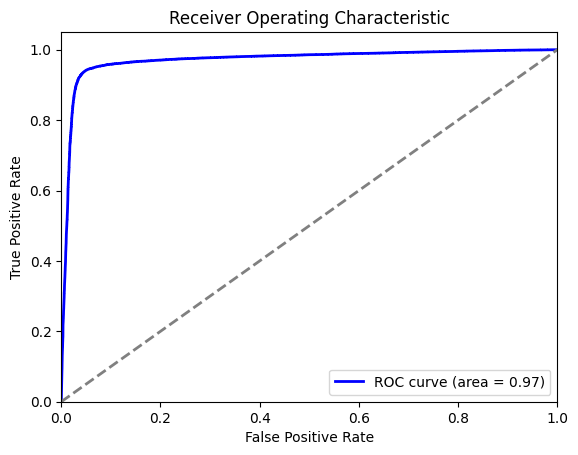

In [265]:
nn_prediction_prob = model_nn.predict(X_test_matrix)
nn_pred = np.where(nn_prediction_prob > 0.6,1,0)
print(f'confusion matrix \n{confusion_matrix(y_test,nn_pred)}')
print('------------------------------------------')
print(f'classification report \n{classification_report(y_test,nn_pred)}')
print('------------------------------------------')
fpr, tpr, thresholds = roc_curve(y_test, nn_prediction_prob)
auc_score = roc_auc_score(y_test, nn_prediction_prob)
print(f'AUC Score: {auc_score}')
print('------------------------------------------')
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step
confusion matrix 
[[24297   517]
 [ 1806 22980]]
------------------------------------------
classification report 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     24814
           1       0.98      0.93      0.95     24786

    accuracy                           0.95     49600
   macro avg       0.95      0.95      0.95     49600
weighted avg       0.95      0.95      0.95     49600

------------------------------------------
AUC Score: 0.9531506370602316
------------------------------------------


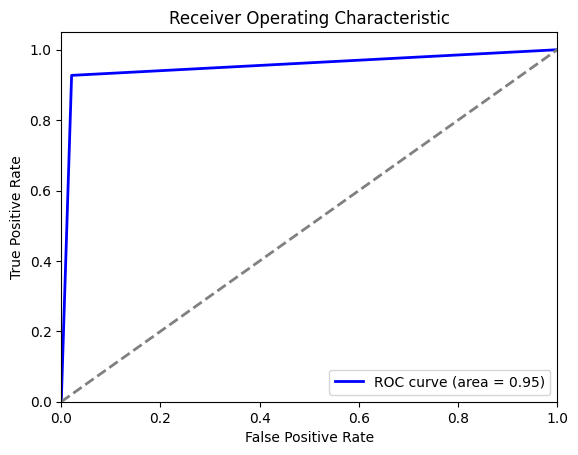

In [266]:
blstm_prediction_prob = model_blstm.predict(X_test_matrix)
blstm_pred = np.where(blstm_prediction_prob > 0.6,1,0)
print(f'confusion matrix \n{confusion_matrix(y_test,blstm_pred)}')
print('------------------------------------------')
print(f'classification report \n{classification_report(y_test,blstm_pred)}')
print('------------------------------------------')
fpr, tpr, thresholds = roc_curve(y_test, blstm_pred)
auc_score = roc_auc_score(y_test, blstm_pred)
print(f'AUC Score: {auc_score}')
print('------------------------------------------')
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step
confusion matrix 
[[24147   667]
 [ 1544 23242]]
------------------------------------------
classification report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     24814
           1       0.97      0.94      0.95     24786

    accuracy                           0.96     49600
   macro avg       0.96      0.96      0.96     49600
weighted avg       0.96      0.96      0.96     49600

------------------------------------------
AUC Score: 0.9554133914233622
------------------------------------------


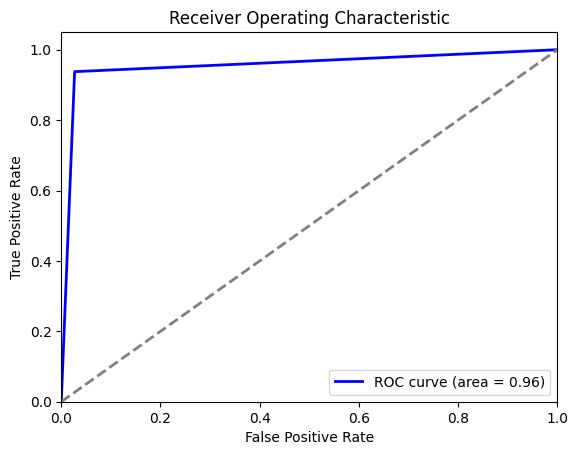

In [268]:
w2v_prediction_prob = model_w2v.predict(X_test_matrix)
w2v_pred = np.where(blstm_prediction_prob > 0.5,1,0)
print(f'confusion matrix \n{confusion_matrix(y_test,w2v_pred)}')
print('------------------------------------------')
print(f'classification report \n{classification_report(y_test,w2v_pred)}')
print('------------------------------------------')
fpr, tpr, thresholds = roc_curve(y_test, w2v_pred)
auc_score = roc_auc_score(y_test, w2v_pred)
print(f'AUC Score: {auc_score}')
print('------------------------------------------')
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

1550/1550 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step
confusion matrix 
[[24169   645]
 [ 1581 23205]]
------------------------------------------
classification report 
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     24814
           1       0.97      0.94      0.95     24786

    accuracy                           0.96     49600
   macro avg       0.96      0.96      0.96     49600
weighted avg       0.96      0.96      0.96     49600

------------------------------------------
AUC Score: 0.9551103004708944
------------------------------------------


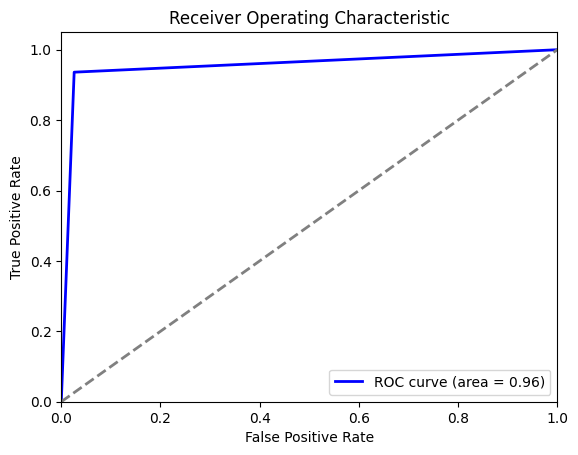

In [269]:
gru_prediction_prob = model_gru.predict(X_test_matrix)
gru_pred = np.where(gru_prediction_prob > 0.5,1,0)
print(f'confusion matrix \n{confusion_matrix(y_test,gru_pred)}')
print('------------------------------------------')
print(f'classification report \n{classification_report(y_test,gru_pred)}')
print('------------------------------------------')
fpr, tpr, thresholds = roc_curve(y_test, gru_pred)
auc_score = roc_auc_score(y_test, gru_pred)
print(f'AUC Score: {auc_score}')
print('------------------------------------------')
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [275]:
def predict_sentiment(review):
    review_sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(review_sequence, maxlen=80, padding='pre')
    prediction = model_w2v.predict(padded_sequence)
    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'negative'

    return sentiment

In [290]:
predict_sentiment('I recently used Zomato to order food, and I was thoroughly disappointed with the experience. The delivery was incredibly slow, taking over two hours to arrive despite the estimated time being just 45 minutes. When the food finally arrived, it was cold and the packaging was damaged. The quality of the food was subpar; the pizza was soggy and the pasta was overcooked and lacked flavor. Additionally, the customer service was unresponsive when I tried to contact them to inquire about the delay. Overall, this was a very frustrating experience, and I expected much better service from Zomato')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


'negative'

In [291]:
review_1 = "I recently used Zomato to order food, and I couldn't be happier with the experience! The delivery was prompt, arriving even earlier than the estimated time. The packaging was excellent, ensuring that the food was hot and fresh when it arrived. The quality of the food was outstanding; the pizza was perfectly cooked with a delicious crust, and the pasta was flavorful and just the right texture. Moreover, the variety of restaurants available on Zomato is impressive, offering something for every taste and preference. The customer service was also top-notch, promptly addressing a minor issue with my order. Overall, Zomato exceeded my expectations, and I will definitely be using their service again."

In [304]:
import pickle

In [305]:
with open('tokenizer.pkl', 'wb') as file:
    pickle.dump(tokenizer, file)
    

In [306]:
shutil.move('tokenizer.pkl', '/kaggle/working/tokenizer.pkl')

'/kaggle/working/tokenizer.pkl'

In [312]:
import re
from string import punctuation 
from nltk import word_tokenize

In [1]:
class Zomato:
    def __init__(self, review, tokenizer, model_w2v):
        self.review = review
        self.tokenizer = tokenizer
        self.model_w2v = model_w2v
        self.contractions = {
            "ain't": "are not", "aren't": "are not", "can't": "cannot", "could've": "could have", "couldn't": "could not",
            "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
            "haven't": "have not", "he'd": "he had or he would", "he'll": "he will or he shall", "he's": "he is or he has",
            "how'd": "how did or how would", "how'll": "how will", "how's": "how is or how does", "I'd": "I had or I would",
            "I'll": "I will", "I'm": "I am", "I've": "I have", "isn't": "is not", "it'd": "it would", "it'll": "it will",
            "it's": "it is", "let's": "let us", "might've": "might have", "must've": "must have", "mustn't": "must not",
            "needn't": "need not", "shan't": "shall not", "she'd": "she had or she would", "she'll": "she will",
            "she's": "she is or she has", "should've": "should have", "shouldn't": "should not", "that'd": "that would",
            "that's": "that is", "there'd": "there would", "there'll": "there will", "there're": "there are", "there's": "there is",
            "they'd": "they had or they would", "they'll": "they will", "they're": "they are", "they've": "they have",
            "wasn't": "was not", "we'd": "we had or we would", "we'll": "we will", "we're": "we are", "we've": "we have",
            "weren't": "were not", "what'd": "what did or what would", "what'll": "what will", "what're": "what are",
            "what's": "what is", "what've": "what have", "when's": "when is", "where'd": "where did or where would",
            "where'll": "where will", "where're": "where are", "where's": "where is", "where've": "where have",
            "who'd": "who had or who would", "who'll": "who will", "who're": "who are", "who's": "who is", "who've": "who have",
            "why'd": "why did or why would", "why'll": "why will", "why're": "why are", "why's": "why is", "won't": "will not",
            "would've": "would have", "wouldn't": "would not", "you'd": "you had or you would", "you'll": "you will",
            "you're": "you are", "you've": "you have"
        }
        self.preprocessed_review = self.preprocess_text(review)
        self.sentiment = self.predict_sentiment()

    def replace_contractions(self, sentence):
        words = sentence.split()
        new_sentence = []
        for word in words:
            if word.lower() in self.contractions:
                new_sentence.append(self.contractions[word.lower()])
            else:
                new_sentence.append(word)
        return ' '.join(new_sentence)

    def tokenize(self, text):
        clean_text = word_tokenize(text)
        return clean_text

    def remove_num(self, text):
        new_sentence = re.sub(r'\d+', '', text)
        return new_sentence

    def remove_punctuations(self, text):
        cleaned_text = []
        for word in text.split():
            if not any(char in punctuation for char in word):
                cleaned_text.append(word)
        return ' '.join(cleaned_text)

    def preprocess_text(review):
        review = review.lower()
        review = demoji.replace_with_desc(review)
        review = replace_contractions(review)
        review = remove_num(review)
        review = remove_punctuations(review)
        review = ' '.join(tokenize(review))
        return review

    def predict_sentiment(review):
        review = preprocess_text(review)
        review_sequence = tokenizer.texts_to_sequences([review])
        padded_sequence = pad_sequences(review_sequence, maxlen=80, padding='pre')
        prediction = model_w2v.predict(padded_sequence)
        sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
        return sentiment

In [313]:

contractions = {
    "ain't": "are not", "aren't": "are not",  "can't": "cannot", "could've": "could have", "couldn't": "could not",
    "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",  "he'd": "he had or he would", "he'll": "he will or he shall","he's": "he is or he has","how'd": "how did or how would", "how'll": "how will","how's": "how is or how does", "I'd": "I had or I would",  "I'll": "I will", "I'm": "I am",  "I've": "I have",  "isn't": "is not", "it'd": "it would", "it'll": "it will",  "it's": "it is", "let's": "let us", "might've": "might have",  "must've": "must have",  "mustn't": "must not", "needn't": "need not",  "shan't": "shall not",  "she'd": "she had or she would",  "she'll": "she will",  "she's": "she is or she has","should've": "should have",
"shouldn't": "should not", "that'd": "that would",  "that's": "that is",  "there'd": "there would","there'll": "there will", "there're": "there are", "there's": "there is",  "they'd": "they had or they would",  "they'll": "they will", "they're": "they are", "they've": "they have", "wasn't": "was not", "we'd": "we had  or  we would", "we'll": "we will",
    "we're": "we are", "we've": "we have",   "weren't": "were not",   "what'd": "what did or what would", "what'll": "what will",  "what're": "what are", "what's": "what is",  "what've": "what have", "when's": "when is","where'd": "where did or where would", "where'll": "where will", "where're": "where are",  "where's": "where is",  "where've": "where have",
"who'd": "who had or who would",  "who'll": "who will",  "who're": "who are",  "who's": "who is", "who've": "who have",   "why'd": "why did or why would",  "why'll": "why will",  "why're": "why are", "why's": "why is",  "won't": "will not","would've": "would have", "wouldn't": "would not", "you'd": "you had or you would","you'll": "you will",
 "you're": "you are","you've": "you have"}

    
def replace_contractions(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        if word.lower() in contractions:
            new_sentence.append(contractions[word.lower()])
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

def tokenize(text):
    clean_text = word_tokenize(text)
    return clean_text

def remove_num(text):
    new_sentence = re.sub(r'\d+', '', text)
    return new_sentence

def remove_punctuations(text):
    cleaned_text = []
    for word in text.split():
        if not any(char in punctuation for char in word):
            cleaned_text.append(word)
    return ' '.join(cleaned_text)

def preprocess_text(review):
    review = review.lower()
    review = demoji.replace_with_desc(review)
    review = replace_contractions(review)
    review = remove_num(review)
    review = remove_punctuations(review)
    review = ' '.join(tokenize(review))
    return review

def predict_sentiment(review):
    review = preprocess_text(review)
    review_sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(review_sequence, maxlen=80, padding='pre')
    prediction = model_w2v.predict(padded_sequence)
    sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
    return sentiment
    
new_review = "The food was amazing and the service was excellent."
print(f"The sentiment of the review is: {predict_sentiment(new_review)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
The sentiment of the review is: Positive


In [302]:
review_1

'i recently used zomato to order food, and i could not be happier with the experience! the delivery was prompt, arriving even earlier than the estimated time. the packaging was excellent, ensuring that the food was hot and fresh when it arrived. the quality of the food was outstanding; the pizza was perfectly cooked with a delicious crust, and the pasta was flavorful and just the right texture. moreover, the variety of restaurants available on zomato is impressive, offering something for every taste and preference. the customer service was also top-notch, promptly addressing a minor issue with my order. overall, zomato exceeded my expectations, and i will definitely be using their service again.'

In [320]:
print('tensorflow : ',tf.__version__)
print('demoji : ',demoji.__version__)
print('nltk : ',nltk.__version__)

tensorflow :  2.15.0
demoji :  1.1.0
nltk :  3.2.4


In [2]:
!python --version 

Python 3.10.13
